In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_embeddings, load_labels, compute_all_labels

In [2]:
IMAGE_FOLDER = "figures/2d_plots"
DATA_FOLDER: str = "data"
EMB_FOLDER: str = "data/embeddings"

embeddings = load_embeddings(EMB_FOLDER)
labels = load_labels(DATA_FOLDER)
all_labels = compute_all_labels(labels)

models = embeddings.keys()
datasets = labels.keys()

# let's modify embeddings to be {model: {dataset: np.array (total_frames, features)}}
# and labels to be {dataset: [list (tot n frames) of lists (labels in frame)]}
#loaded_embeddings = aggregate_embeddings(loaded_embeddings)
#labels = aggregate_labels(labels)

In [3]:
[(k, len(e), len(e[0])) for k, e in labels.items()]

[('sons_al_balco_2020', 114, 61),
 ('sons_al_balco_2021', 125, 61),
 ('granollers', 64, 47)]

In [4]:
len(all_labels), all_labels  

(29,
 ['Human/Cough',
  'Human/Movement',
  'Human/Movement/Steps',
  'Human/Music',
  'Human/Voice',
  'Industrial/Construction',
  'Industrial/Industry',
  'Industrial/Vacuum',
  'Industrial/Ventilation',
  'Nature/Animals/Bird',
  'Nature/Animals/Cat',
  'Nature/Animals/Dog',
  'Nature/Elements/Water',
  'Nature/Elements/Wind',
  'Nature/Vegetation',
  'Signals',
  'Signals/Alarm',
  'Signals/Bells',
  'Signals/Klaxon',
  'Signals/Siren',
  'Things/Blind',
  'Things/Door',
  'Things/Movement',
  'Things/Trolley',
  'Transport/Motorized',
  'Transport/Motorized/Air',
  'Transport/Motorized/Rail',
  'Transport/Motorized/Road',
  'Transport/Non-motorized'])

In [5]:
models = list(embeddings.keys())
models

['openl3', 'wav2vec', 'yamnet']

In [6]:
datasets = list(labels.keys())
datasets

['sons_al_balco_2020', 'sons_al_balco_2021', 'granollers']

In [7]:
def study_dataset(labels, embeddings):
    # labels is a list (n_files) of lists (n_frame in each file) of lists of labels
    # embeddings is a list (n_files) of np.arrays of shape (n_frame, emb_dim)

    print("Number of files: ", len(labels))

    print("Dimensions of the embeddings: ", embeddings[0].shape[1])

    print("Total number of frames: ", sum([e.shape[0] for e in embeddings]))

    n_empty_labs = 0
    for file_l in labels:
        for frame_l in file_l:
            if len(frame_l) == 0:
                n_empty_labs += 1
    print("Number of frames with empty labels: ", n_empty_labs)
    
    pd.Series([e.shape[0] for e in embeddings]).hist()
    plt.title("Distribution of number of frames in the files")
    plt.show()

    # bar chart of the number of labels in this dataset
    total_labels = []
    for file_l in labels:
        for frame_l in file_l:
            total_labels.extend(frame_l)
    keys, counts = np.unique(total_labels, return_counts=True)
    bars = plt.bar(keys, counts)
    # plot values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.title("Value counts of the labels")
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

    # bar chart of the first level of the taxonomy
    total_labels = []
    for file_l in labels:
        for frame_l in file_l:
            total_labels.extend([el.split("/")[0] for el in frame_l])
    keys, counts = np.unique(total_labels, return_counts=True)
    bars = plt.bar(keys, counts)
    # plot values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.title("Value counts of the first level of the labels")
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

Statistics and plot for openl3 and sons_al_balco_2020
Number of files:  114
Dimensions of the embeddings:  512
Total number of frames:  7236
Number of frames with empty labels:  3958


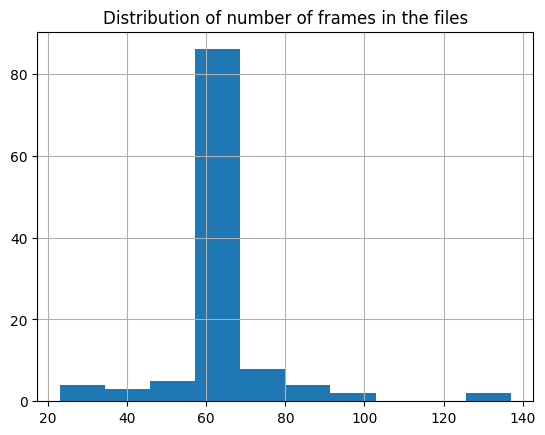

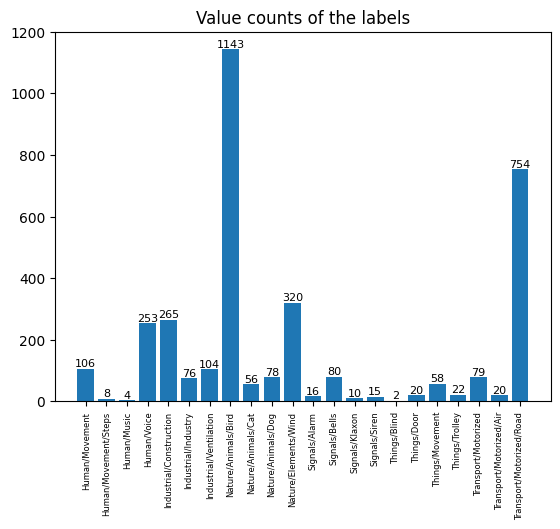

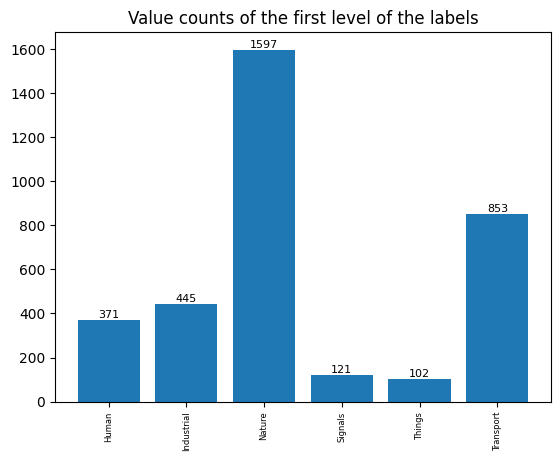

Statistics and plot for openl3 and sons_al_balco_2021
Number of files:  125
Dimensions of the embeddings:  512
Total number of frames:  8356
Number of frames with empty labels:  3286


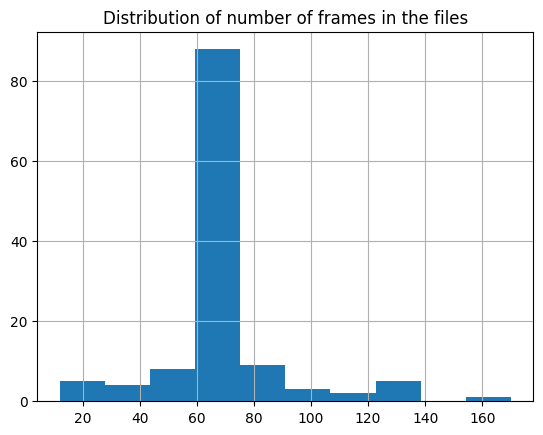

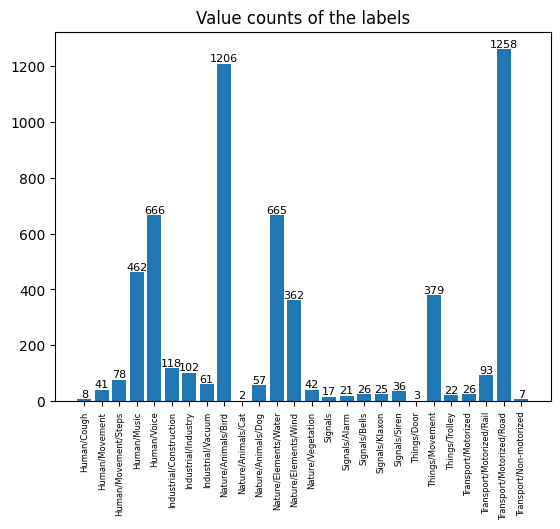

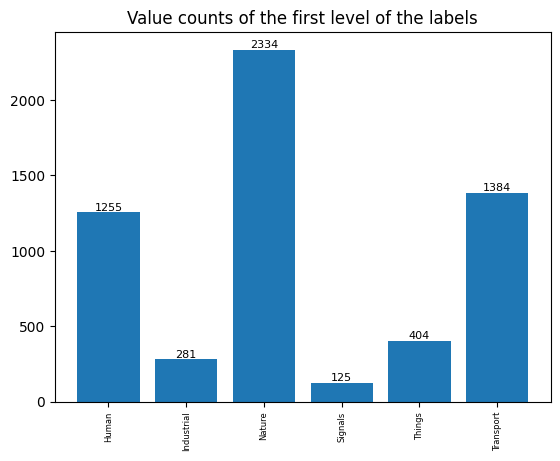

Statistics and plot for openl3 and granollers
Number of files:  64
Dimensions of the embeddings:  512
Total number of frames:  3600
Number of frames with empty labels:  932


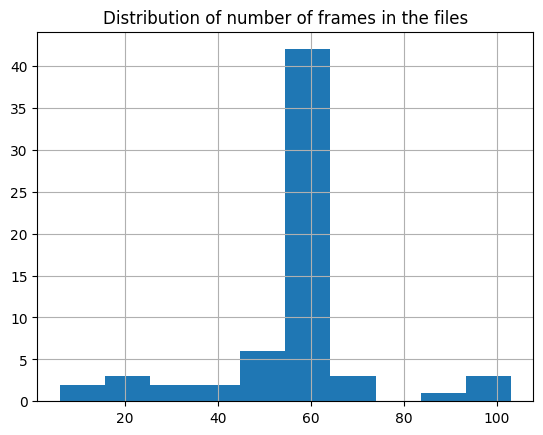

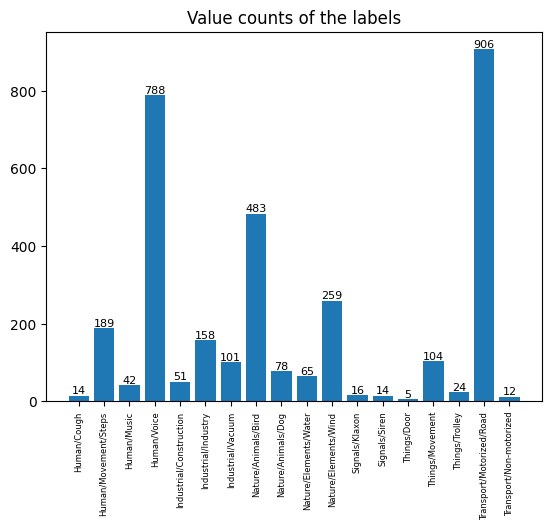

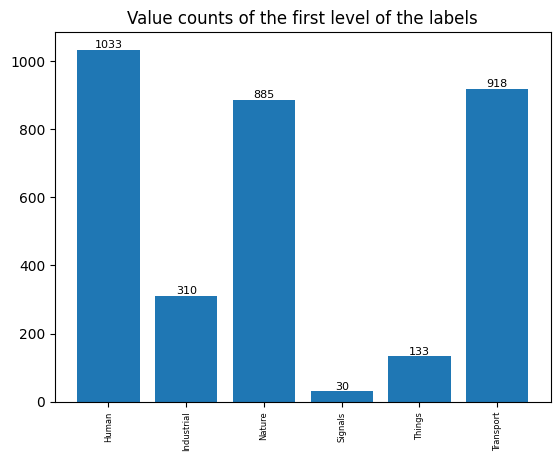

Statistics and plot for wav2vec and sons_al_balco_2020
Number of files:  114
Dimensions of the embeddings:  768
Total number of frames:  7236
Number of frames with empty labels:  3958


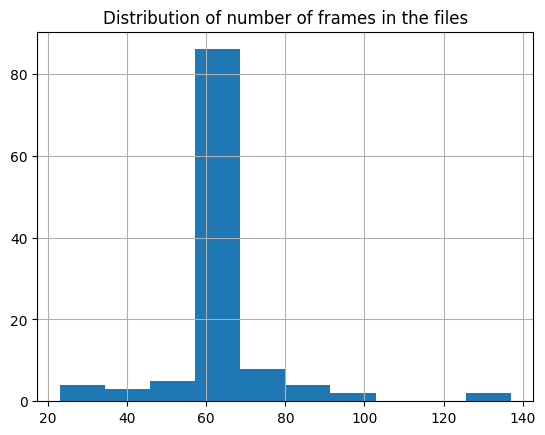

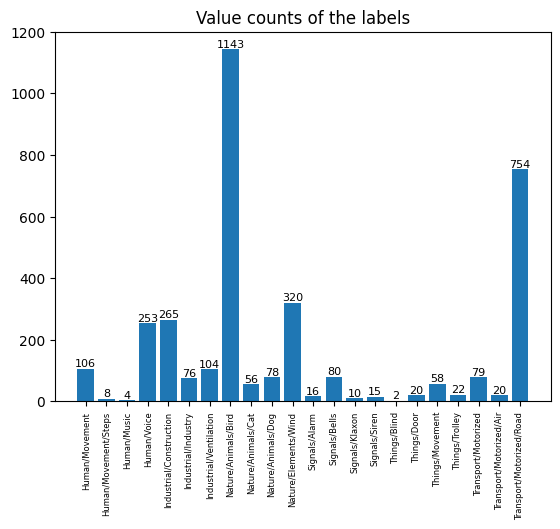

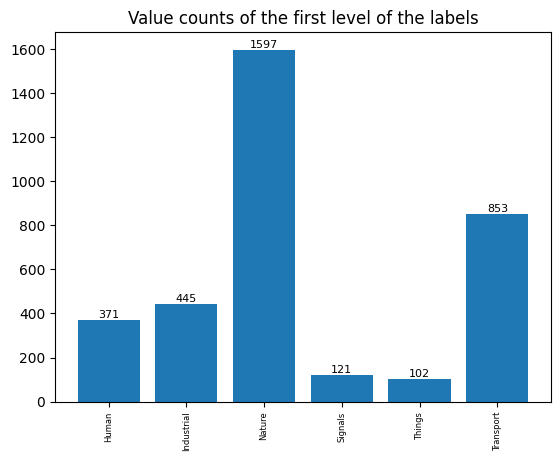

Statistics and plot for wav2vec and sons_al_balco_2021
Number of files:  125
Dimensions of the embeddings:  768
Total number of frames:  8356
Number of frames with empty labels:  3286


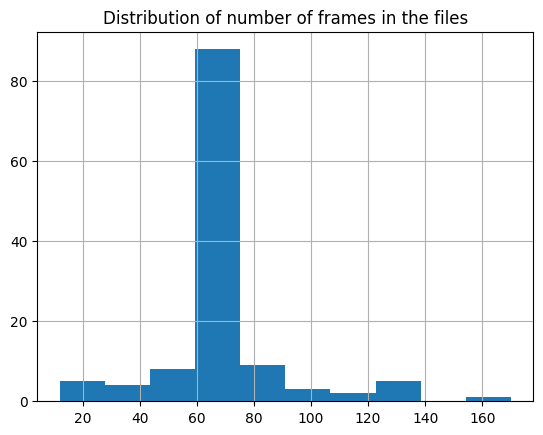

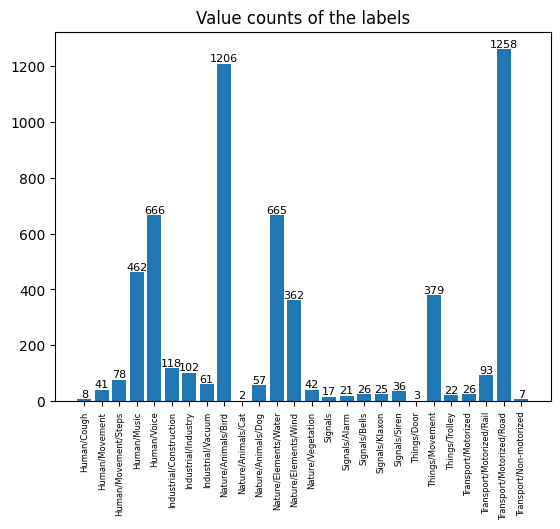

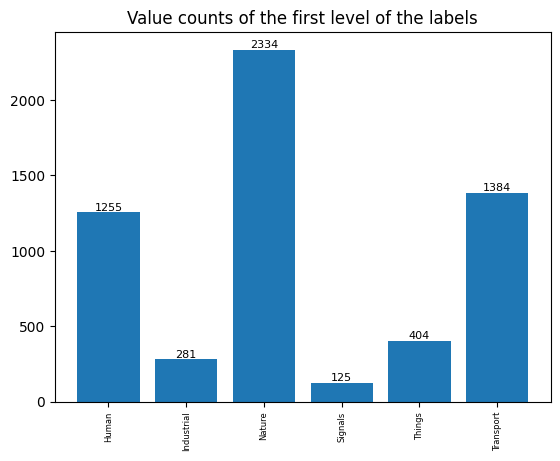

Statistics and plot for wav2vec and granollers
Number of files:  64
Dimensions of the embeddings:  768
Total number of frames:  3600
Number of frames with empty labels:  932


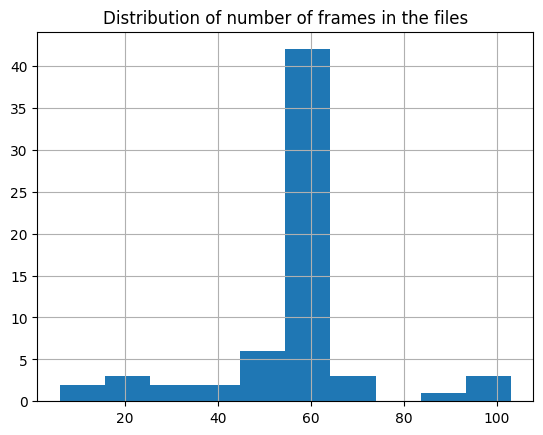

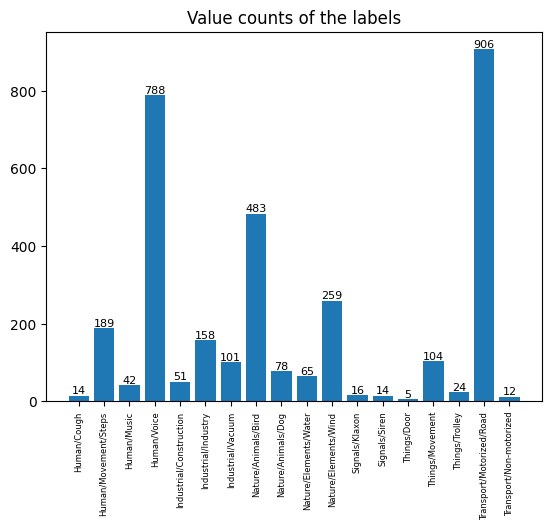

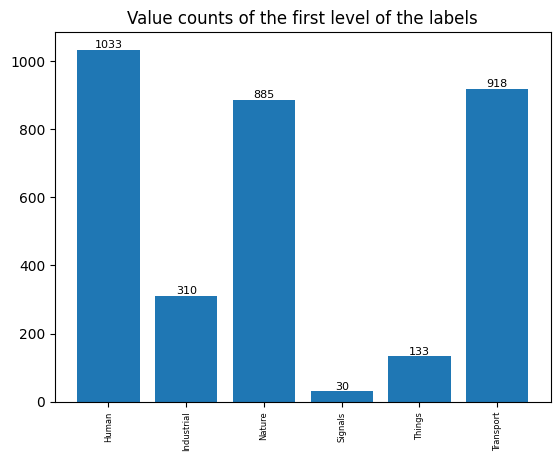

Statistics and plot for yamnet and sons_al_balco_2020
Number of files:  114
Dimensions of the embeddings:  1024
Total number of frames:  7236
Number of frames with empty labels:  3958


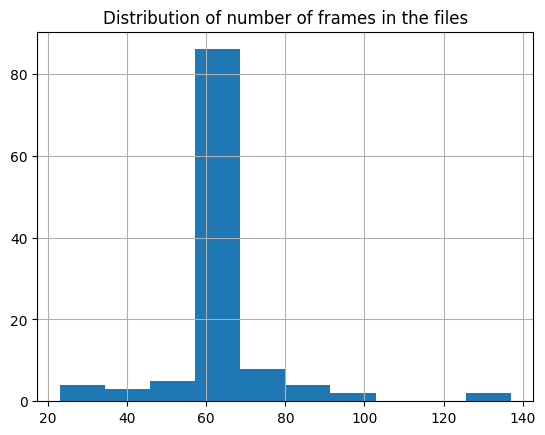

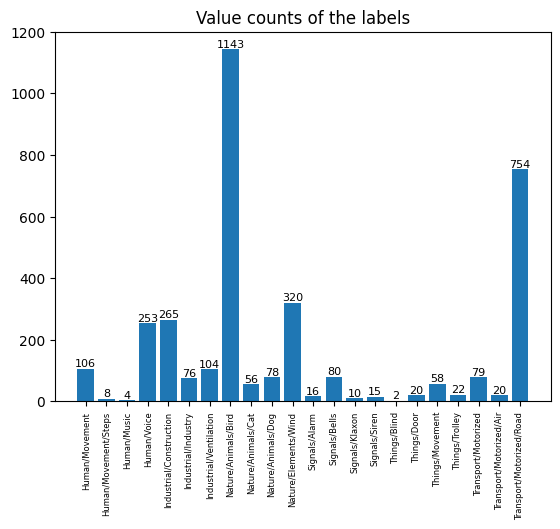

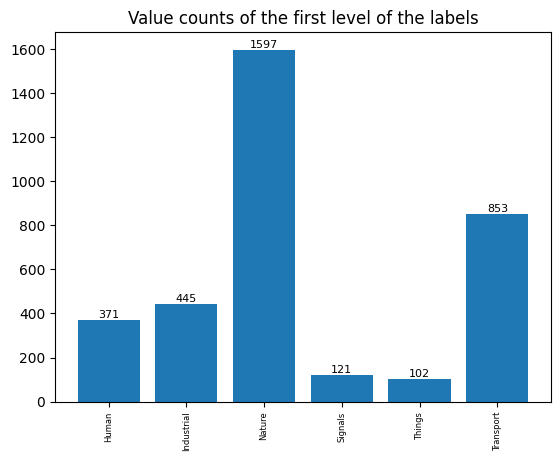

Statistics and plot for yamnet and sons_al_balco_2021
Number of files:  125
Dimensions of the embeddings:  1024
Total number of frames:  8356
Number of frames with empty labels:  3286


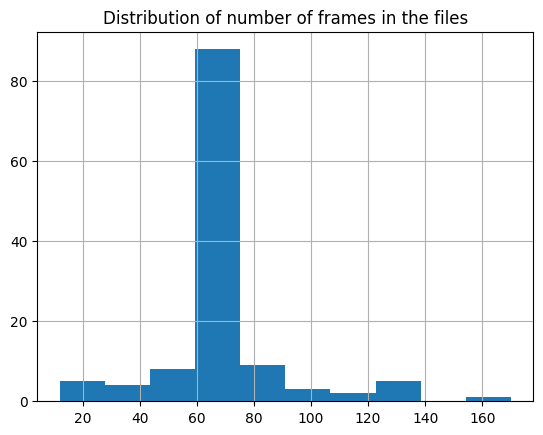

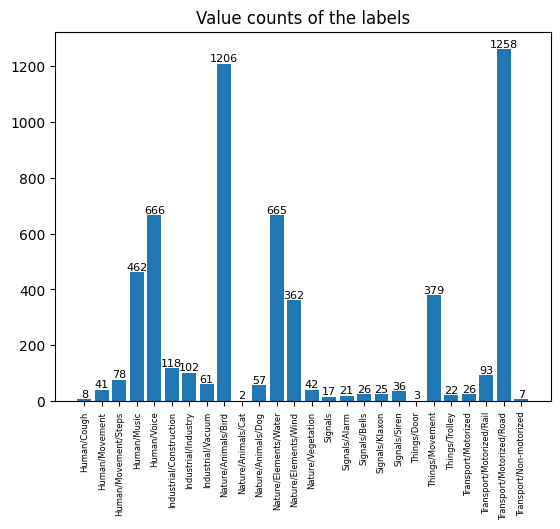

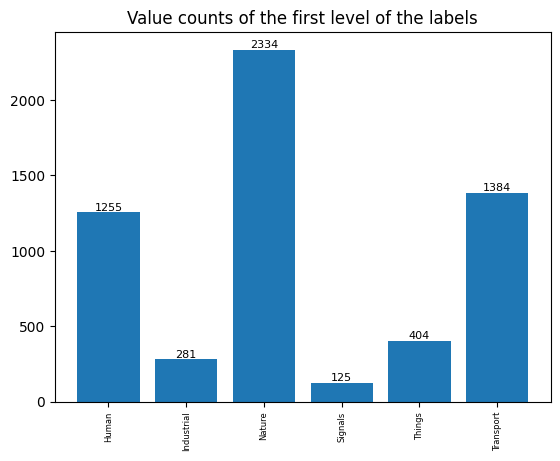

Statistics and plot for yamnet and granollers
Number of files:  64
Dimensions of the embeddings:  1024
Total number of frames:  3600
Number of frames with empty labels:  932


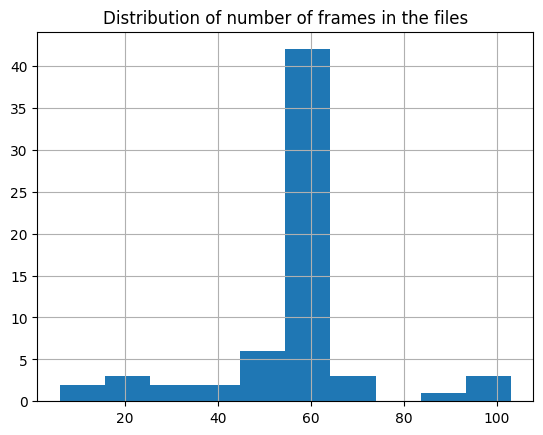

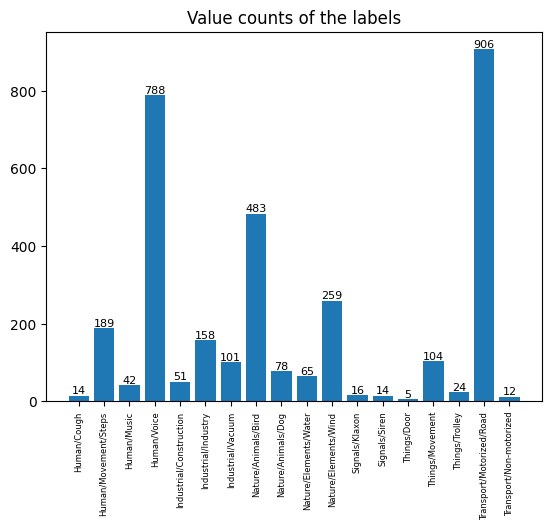

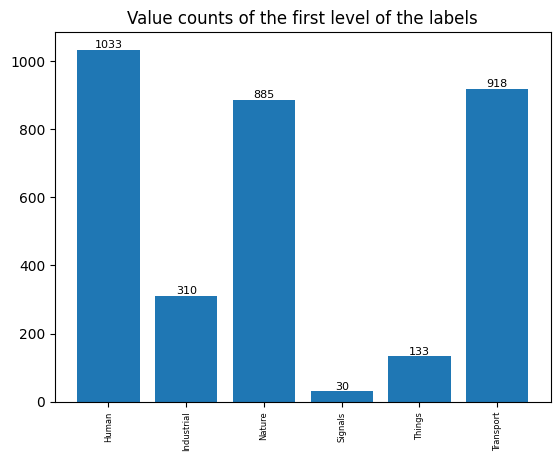

In [8]:
for model in models:
    for dataset in datasets:
        labs = labels[dataset]
        embs = embeddings[model][dataset]
        print(f"Statistics and plot for {model} and {dataset}")
        study_dataset(labs, embs)

In [11]:
labels

{'sons_al_balco_2020': [[[],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   ['Human/Voice'],
   ['Human/Voice'],
   ['Human/Voice'],
   ['Human/Voice'],
   ['Human/Voice'],
   ['Human/Voice'],
   ['Human/Voice'],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   [],
   []],
  [[],
   [],
   [],
   [],
   [],
   [],
   [],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport/Motorized/Road'],
   ['Transport

In [12]:
labels_count = {l:0 for l in all_labels}
for dataset in datasets:
    for file_l in labels[dataset]:
        for frame_l in file_l:
            for l in frame_l:
                labels_count[l] += 1
labels_count

{'Human/Cough': 22,
 'Human/Movement': 147,
 'Human/Movement/Steps': 275,
 'Human/Music': 508,
 'Human/Voice': 1707,
 'Industrial/Construction': 434,
 'Industrial/Industry': 336,
 'Industrial/Vacuum': 162,
 'Industrial/Ventilation': 104,
 'Nature/Animals/Bird': 2832,
 'Nature/Animals/Cat': 58,
 'Nature/Animals/Dog': 213,
 'Nature/Elements/Water': 730,
 'Nature/Elements/Wind': 941,
 'Nature/Vegetation': 42,
 'Signals': 17,
 'Signals/Alarm': 37,
 'Signals/Bells': 106,
 'Signals/Klaxon': 51,
 'Signals/Siren': 65,
 'Things/Blind': 2,
 'Things/Door': 28,
 'Things/Movement': 541,
 'Things/Trolley': 68,
 'Transport/Motorized': 105,
 'Transport/Motorized/Air': 20,
 'Transport/Motorized/Rail': 93,
 'Transport/Motorized/Road': 2918,
 'Transport/Non-motorized': 19}

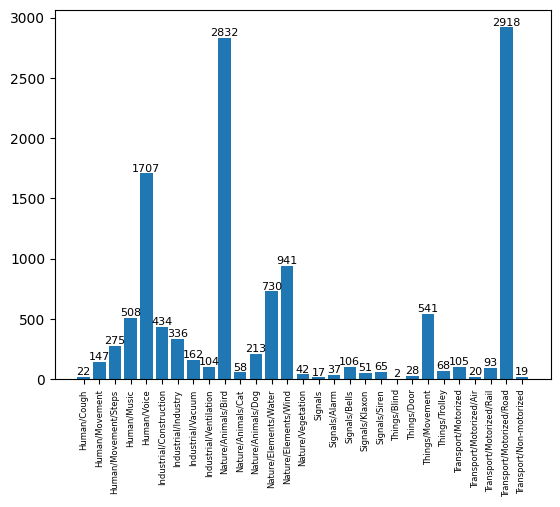

In [17]:
# bar chart of the number of labels in this dataset
keys, counts = zip(*labels_count.items())
bars = plt.bar(keys, counts)
# plot values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)
# rotate x ticks
plt.xticks(rotation=90, fontsize=6)
plt.show()